In [48]:
from IPython import get_ipython  
get_ipython().magic('reset -sf')

In [49]:
import numpy as np
from math import sin, cos, pi, exp
from numpy.random import randn

from celluloid import Camera
import matplotlib.pyplot as plt

from tqdm import tqdm
from IPython.display import HTML

In [50]:
#Function that has to be approximated

F = np.vectorize(lambda x: cos(6*pi*x))

sigm = np.vectorize(lambda x: 1/(1 + exp(-x)))


In [51]:
MAX = 500 #Number of iterations to train the network

N = 50 #Number of nodes in hidden layer, i.e. number of terms in our series

In [52]:
etamax = 10

eta_start = 0.01

#Learning rate vectors for all weights initialzed
etaW = eta_start*np.ones((N,1))
etaB = eta_start*np.ones((N,1))
etaV = eta_start*np.ones((N,1))

In [53]:
#Initilizing the weights from a normal distribution
#I have used a normal distribution, and some experimentation with shifting/scaling them, but you can try other options.
#What will happen with all weights initialized to zero? To really large numbers? What if we draw them from some other distribution?

#Be careful about weight initialization
W = randn(N, 1) #Weights from the input for the hidden layer, i.e. the w_i's in our series \sum v_i sigmoid(w_i x + b_i)
B = 100*randn(N, 1) #Bias at each node at the hidden layer, i.e. the b_i's in our series \sum v_i sigmoid(w_i x + b_i)

V = 20*randn(N,1) #Weights from hidden to output layer, i.e. constants v_i in our series

W = W + abs(np.min(W))*100.0
#V = V + abs(np.min(V))*10.0

In [54]:
#Intializing variables to store weight values from previous iterations.
W_p = 0*W
W_pp = W_p

dW = W_p

V_p = 0*V
V_pp = V_p

dV = V_p

B_p = 0*B
B_pp = B_p

dB = B_p


In [55]:
#Increase the training size as you increase number of parameters
x = np.arange(-1,1, 0.001) #Training input
x = x[np.newaxis, :]

Y = F(x)

Tsize = x.size #Training input size
O = np.zeros((1,Tsize)) #Initializing Output Array

In [56]:
#Standardizing data
x2 =  (x - np.mean(x) ) /np.std(x)

Y2 =  (Y - np.mean(Y) ) /np.std(Y)



(-1.5556349186104055, 1.5556349186104026)

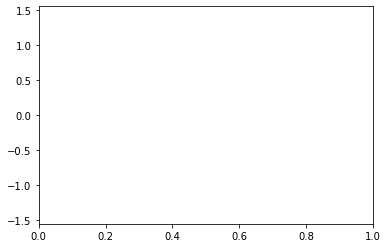

In [57]:
E_RR = []

fig, ax = plt.subplots()
camera = Camera(fig)

ax.set_ylim([1.1*np.min(Y2), 1.1*np.max(Y2)])

In [58]:
for iter in tqdm(range(MAX)):
    H = sigm(W@x2  +  B) #adds vector B to every column of W*x
    O = V*H
    O = np.sum(O, axis = 0)
    O = O[np.newaxis, :]
    
    dW_p = dW
    dV_p = dV
    dB_p = dB
    
    delV = (O - Y2)
    
    dV = H*delV
    dV = np.sum(dV,1)/(Tsize)
    dV = dV[:, np.newaxis]
    
    delW = H*(1 - H)*(delV*V)
    
    dW = x2*delW
    dW = np.sum(dW,1)/(Tsize)
    dW = dW[:, np.newaxis]
    
    dB = delW
    dB = np.sum(dB,1)/(Tsize)
    dB = dB[:, np.newaxis]
    
    if iter > 3:
        etaW = abs((W_p - W_pp)/(dW - dW_p))
        etaW[etaW > etamax] = etamax
        
        etaV = abs( (V_p - V_pp)/(dV - dV_p) )
        etaV[etaV > etamax] = etamax
        
        etaB = abs((B_p - B_pp)/(dB - dB_p) )
        etaB[etaB > etamax] = etamax
    
    W = W - etaW*dW
    V = V - etaV*dV
    B = B - etaB*dB
    
    W_pp = W_p
    W_p = W
    
    V_pp = V_p
    V_p = V
    
    B_pp = B_p
    B_p = B
    
    E_RR.append(np.sum((O - Y2)**2)/Tsize)
    
    ax.plot(x2[0], O[0], c = 'blue')
    ax.plot(x2[0], Y2[0], c = 'red')
    
    camera.snap()

100%|██████████| 500/500 [00:14<00:00, 34.02it/s]


In [59]:
animation = camera.animate(interval = 25)
animation.save('output.mp4', dpi = 400)

In [60]:
HTML(animation.to_html5_video())